In [ ]:
# install dependencies : 

!pip install tensorflow opencv-python matplotlib

In [ ]:
# check if the dependencies have been installed

!pip list

# Extra - for listing directories
###     >>> os.listdir('data')

###     >>> i aint writing any code for GPU cause i dont have any which is usable

# 1.1 remove corrupted images : 

In [22]:
import cv2
import imghdr
import os
from matplotlib import pyplot as plt
import tensorflow as tf

2025-04-04 04:53:00.955914: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 04:53:00.962166: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 04:53:00.977090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743722581.001371   19358 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743722581.008563   19358 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743722581.027846   19358 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [16]:
data_dir = 'data'

In [17]:
# image extensions to be used :
image_ext = ['jpeg', 'jpg', 'png', 'bnp']

# Extra - cv2 returns a numpy array 3dim if colored and 2dim if BW
### also matplotlib to display image for analysis

In [12]:
img = cv2.imread(os.path.join(data_dir, "happy", "image32.jpeg"))
print(img.shape)
print(img. ndim)
print(img)

(256, 197, 3)
3
[[[236 236 236]
  [238 238 238]
  [240 240 240]
  ...
  [234 234 234]
  [240 240 240]
  [248 248 248]]

 [[236 236 236]
  [239 239 239]
  [241 241 241]
  ...
  [237 237 237]
  [241 241 241]
  [247 247 247]]

 [[235 235 235]
  [238 238 238]
  [241 241 241]
  ...
  [238 238 238]
  [241 241 241]
  [247 247 247]]

 ...

 [[255 254 255]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [252 252 252]
  [248 248 248]]

 [[252 253 255]
  [250 251 255]
  [253 252 254]
  ...
  [253 253 253]
  [250 250 250]
  [246 246 246]]

 [[249 250 254]
  [247 248 252]
  [250 249 251]
  ...
  [251 251 251]
  [248 248 248]
  [245 245 245]]]


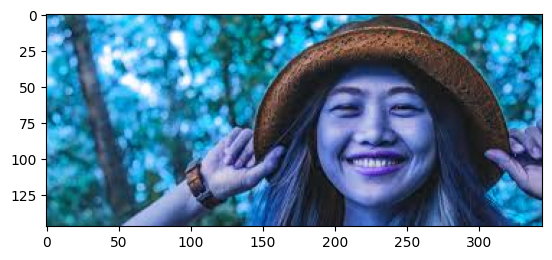

In [14]:
plt.imshow(img)

# 1.2 filtering out images

In [19]:
for imageFolder in os.listdir(data_dir) :
    for image in os.listdir(os.path.join(data_dir, imageFolder)) :
        newPath = os.path.join(data_dir, imageFolder, image)
        try :
            img = cv2.imread(newPath)
            tip = imghdr.what(newPath)
            if tip not in image_ext:
                print(f"this image in the dataset ain't valid {newPath}")
                os.remove(newPath)
        
        except Exception as e : 
            print("issue with image {}".format(image_path))

[ WARN:0@631.154] global grfmt_png.cpp:695 read_chunk chunk data is too large
libpng warning: iCCP: known incorrect sRGB profile


# 1.3 Loading the dataset

In [23]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty